<center><a target="_blank" href="https://academy.constructor.org/"><img src=https://lh3.googleusercontent.com/d/1EmH3Jks5CpJy0zK3JbkvJZkeqWtVcxhB width="500" style="background:none; border:none; box-shadow:none;" /></a> </center>
<hr />

# <h1 align="center">Exercise 2: Multiple Linear Regression (Part 2)</h1>

<hr />
<center>Constructor Academy, 2024</center>

## Task

__Part 2: Feature Transformation__

1. Keeping the same pipeline for cross-validation, try different methods for scaling, e.g. `StandardScaler` and `MinMaxScaler`.

  - Which scaling method performs better for your data set?
  

2. Use the `pairplot` functionality of the `seaborn` package to visualize the variables.

3. Use the pipeline from before with the scaling methode that performed best.

4. Inverse transformation: Look in the pair plot for non-linear relationships between features.

  - Investigate the effect of transforming the individual features by taking the inverse ($1/𝑥$).

  - Test feature by feature and estimate the effect on the overall performance of the model.

  - Apply the transformation for all the features for which it showed improvement.

  - Are there skewed features that could be normalized by applying $log$ transformation?


## Import Libraries and Preprocess the Data

In [35]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%load_ext lab_black
# %load_ext nb_black

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer


# import functions from our python module in the functions.py script
from functions import predict_metrics

In [37]:
plt.style.use("ggplot")

In [38]:
data_path = "../data/winequality-white_clean.csv"

In [39]:
data = pd.read_csv(data_path)
data = data.drop("Unnamed: 0", axis=1)
print(data.shape)
data.head()

(4487, 12)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

We're exploring the idea of using the Wine Quality dataset to predict alcohol content instead of wine quality, primarily because we want to try a regression task. Predicting alcohol content offers several advantages over wine quality: 

1. **Simpler Relationship**: The direct correlation between wine attributes and alcohol content may lead to more accurate models.
2. **Consistency**: The relationship between wine's physicochemical attributes and its alcohol content is likely more consistent than with subjective quality ratings.
3. **Objectivity**: Alcohol content is quantifiable and devoid of the subjectivity associated with wine quality ratings. 

For that reason, quality will not be used as part of our training data, since it can provide data leakage as it's already the original target variable of the dataset.

In [40]:
# Select X and y values (predictor and outcome)
X = data.iloc[:, :-2]
y = data.iloc[:, 10]
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  
0                 45.0                 170.0   1.0010  3.00       0.45  
1                 14.0                 132.0   0.9940  3.30       0.49  
2                 30.0                  97.0   0.9951  3.26       0.44  
3                 47.0                 186.0   0.9956  3.19       0.40  
4                 47.0                 186.0   0.9956  3.19       0.40

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=19
)
print(f"Training set has {X_train.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")

Training set has 4038 samples.
Testing set has 449 samples.


## Feature Transformation

<center><a target="_blank" href="https://towardsdatascience.com/apache-spark-mllib-tutorial-7aba8a1dce6e"><img src="https://drive.google.com/uc?id=1_7YXyuerDB051uZjTR3jKyYMTm9MDgWg" width="700" style="background:none; border:none; box-shadow:none;" /></a> </center>

Feature transformation is simply a function that transforms features from one representation to another. But why would we transform our features? 
Well there are many reasons, such as:
- data types are not suitable to be fed into a machine learning algorithm, e.g. text, categories
- feature values may cause problems during the learning process, e.g. data represented in different scales
- we want to reduce the number of features to plot and visualize data, speed up training or improve the accuracy of a specific model

### StandardScaler

In [42]:
sc = StandardScaler()
model = LinearRegression()
pipeline = Pipeline([("data_scaling", sc), ("estimator", model)])

lm_all = pipeline.fit(X_train, y_train)
y_pred_all = lm_all.predict(X_test)
predict_metrics(y_test, y_pred_all)

MAE 0.2736958758666269
MSE 0.12330666751735284
RMSE 0.3511504912674235
Explained Var Score 0.9186473104847064


### MinMaxScaler 

In [43]:
sc = MinMaxScaler()
model = LinearRegression()
pipeline = Pipeline([("data_scaling", sc), ("estimator", model)])

lm_all = pipeline.fit(X_train, y_train)
y_pred_all = lm_all.predict(X_test)
predict_metrics(y_test, y_pred_all)

MAE 0.27369587586662575
MSE 0.12330666751735353
RMSE 0.3511504912674244
Explained Var Score 0.918647310484706


### RobustScaler

In [44]:
sc = RobustScaler()
model = LinearRegression()
pipeline = Pipeline([("data_scaling", sc), ("estimator", model)])

lm_all = pipeline.fit(X_train, y_train)
y_pred_all = lm_all.predict(X_test)
predict_metrics(y_test, y_pred_all)

MAE 0.2736958758666272
MSE 0.12330666751735296
RMSE 0.35115049126742365
Explained Var Score 0.9186473104847064


### Normalizer

In [45]:
sc = Normalizer()
model = LinearRegression()
pipeline = Pipeline([("data_scaling", sc), ("estimator", model)])

lm_all = pipeline.fit(X_train, y_train)
y_pred_all = lm_all.predict(X_test)
predict_metrics(y_test, y_pred_all)

MAE 0.8298081357446573
MSE 1.132126531122818
RMSE 1.0640143472354204
Explained Var Score 0.253049412960036


It looks like MinMaxScaler, StandardScaler and RobustScaler performs the best. We will stick to StandardScaler for our analysis.

### Base Model

Before trying out more features transformation techniques, lets make a base model for comparison.

In [46]:
X = data.iloc[:, :-2]
y = data.iloc[:, 10]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

print(f"Training set has {X_train.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")

Training set has 4038 samples.
Testing set has 449 samples.


In [47]:
sc = StandardScaler()
model = LinearRegression()

pipeline = Pipeline([("data_scaling", sc), ("estimator", model)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_scaling', StandardScaler()),
                ('estimator', LinearRegression())])

In [48]:
model_score = pipeline.score(X_test, y_test)
model_score

0.9304203396032735

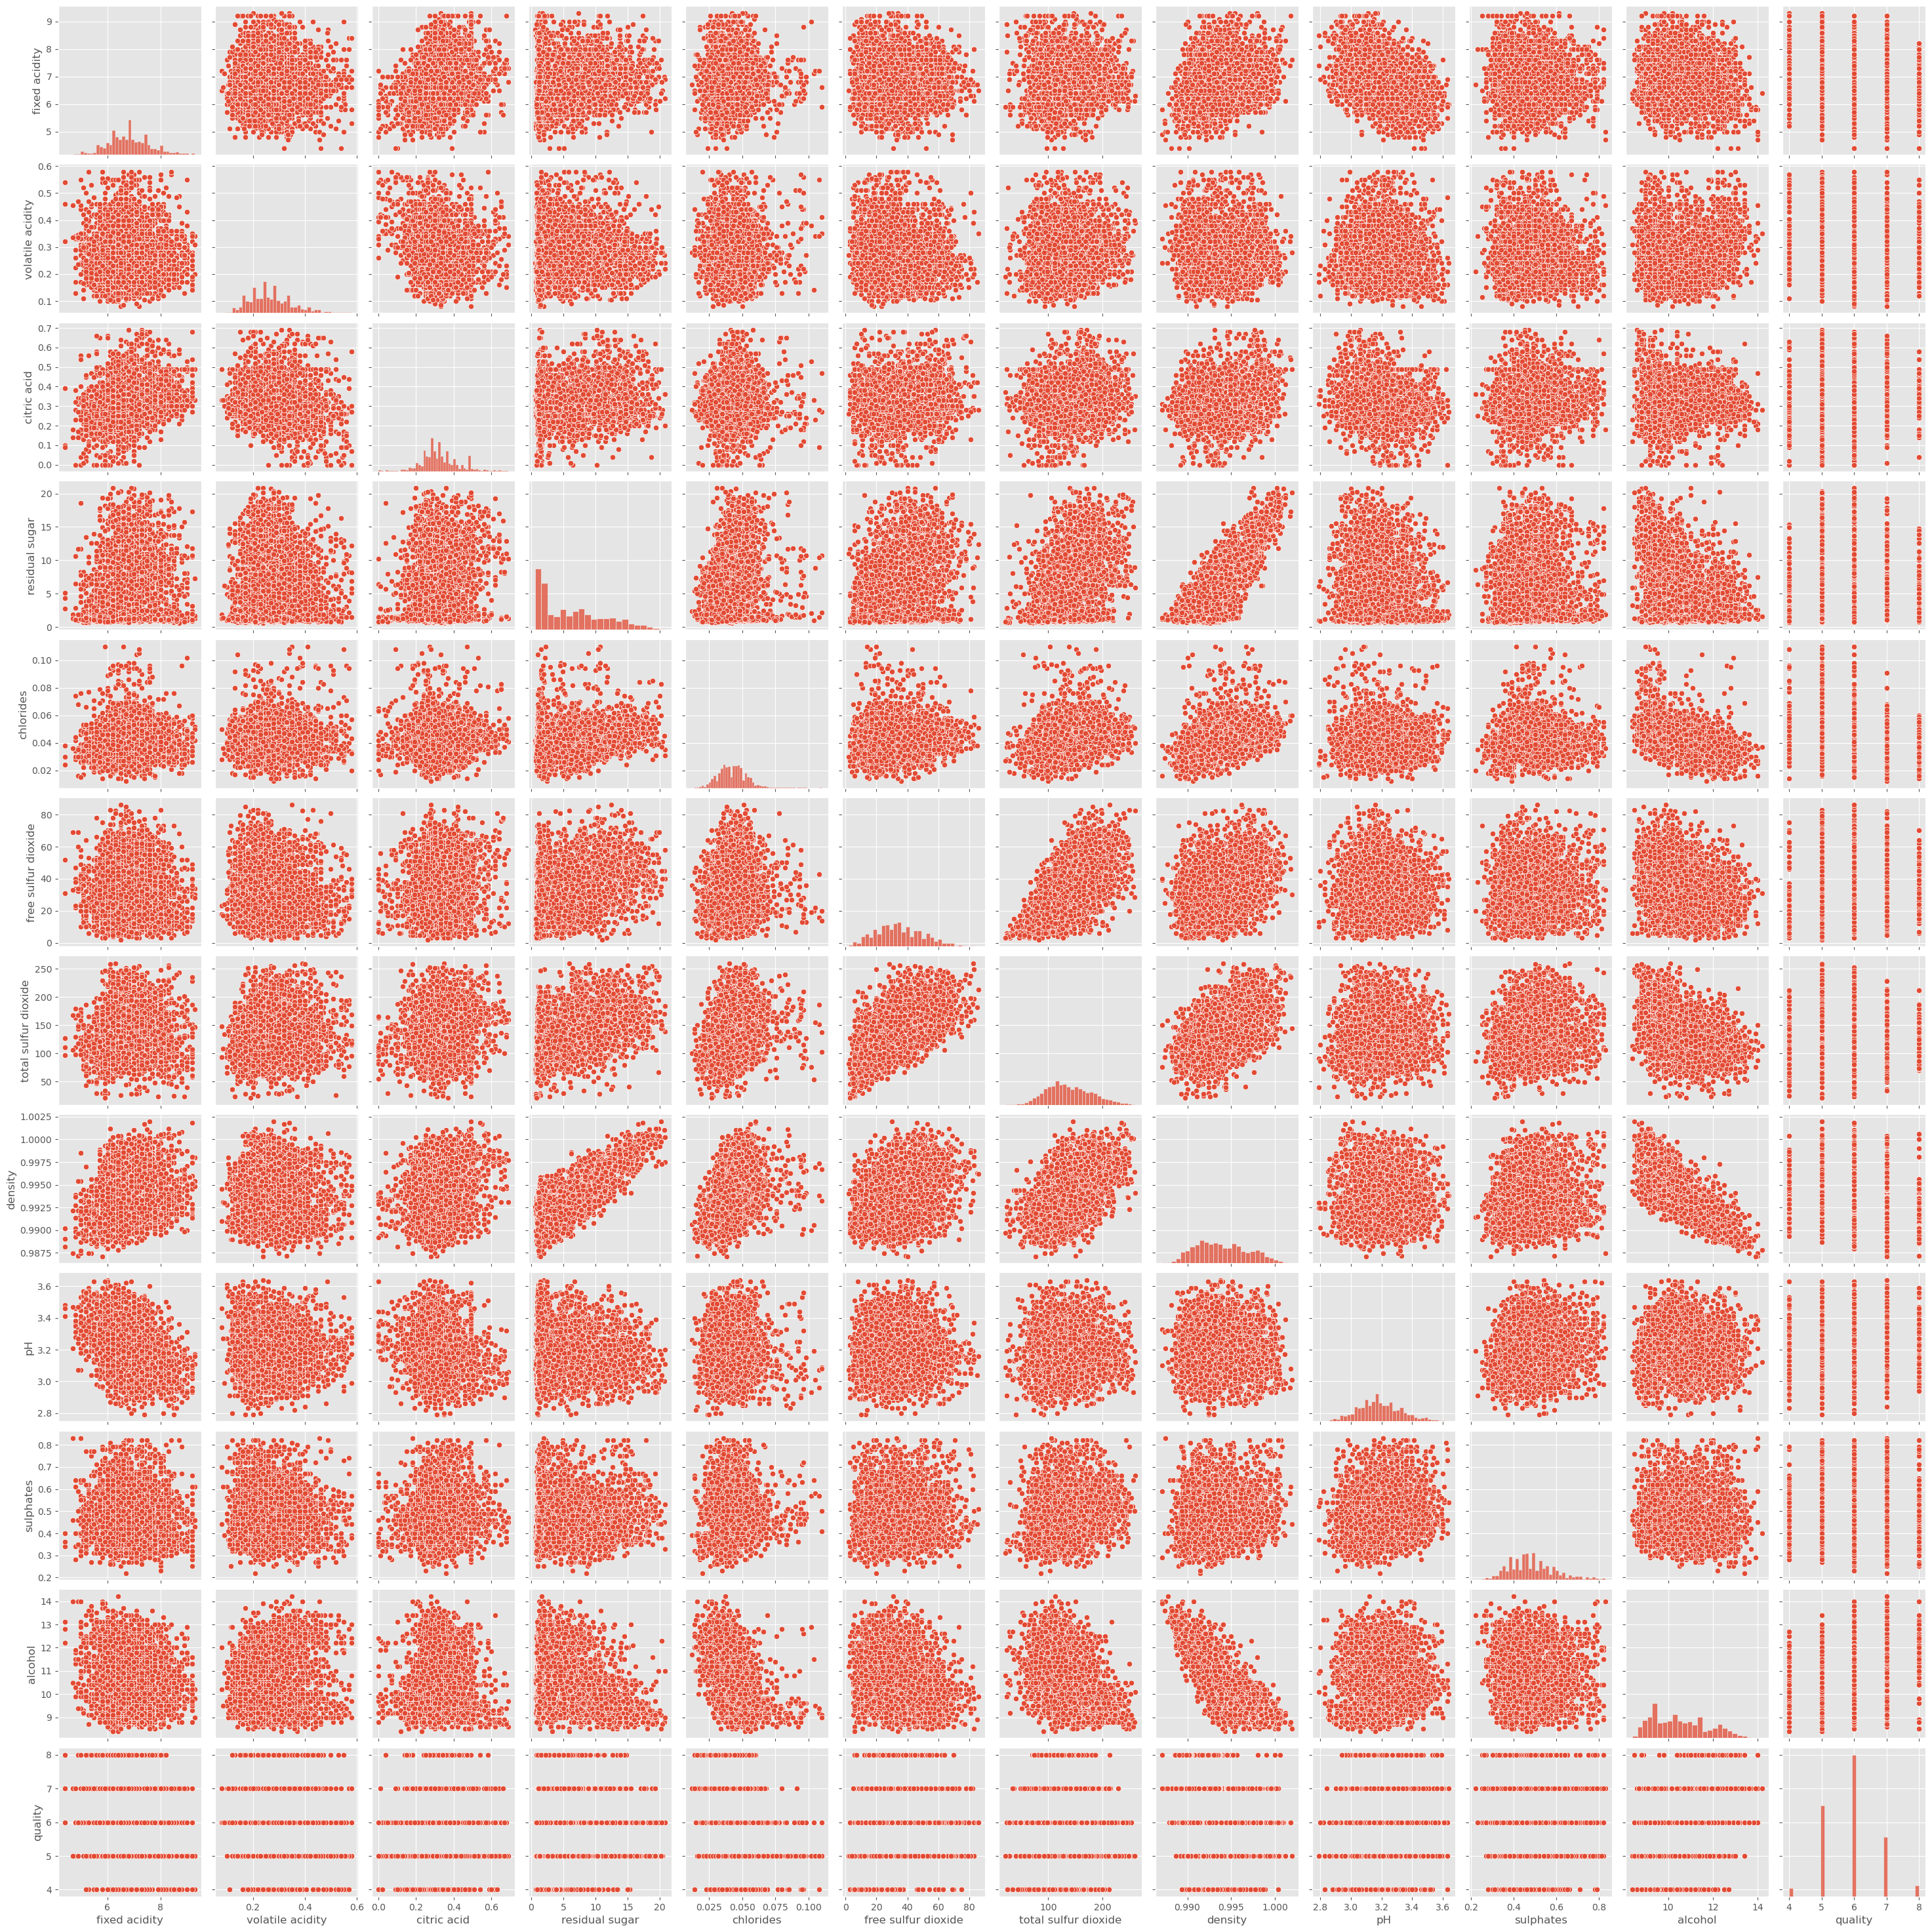

In [49]:
g = sns.pairplot(data)
g
None

### Linearization


Looking at the pairplot above, could you decide which features could be linearized using 1/feature? How does linearised features affect the model? Does the prediction get better or worse? If so, by how much %? 

__The 'chlorides' variable has a shape which most likely would become linear after 1/feature procedure:__

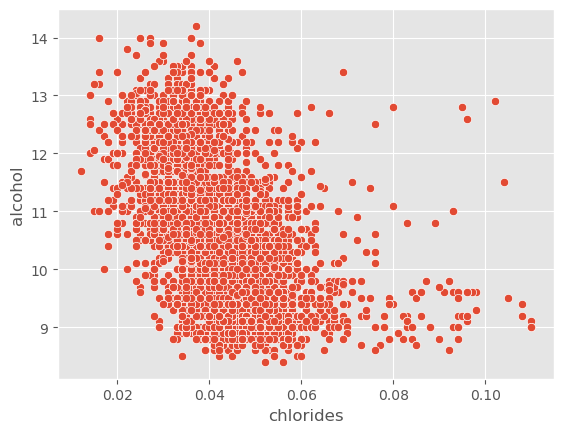

In [50]:
data_inverse = data.copy()
g = sns.scatterplot(data=data_inverse, x="chlorides", y="alcohol")

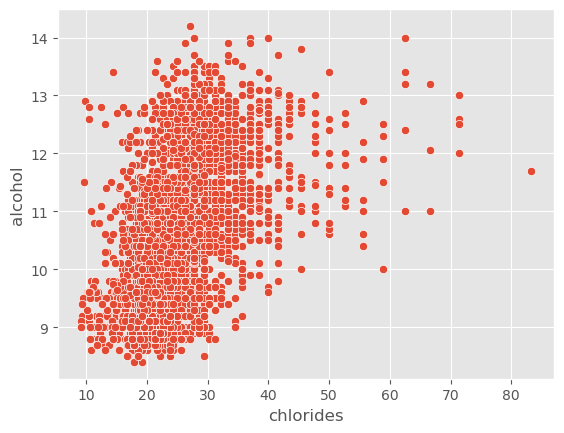

In [51]:
data_inverse["chlorides"] = 1 / data_inverse["chlorides"]
g = sns.scatterplot(data=data_inverse, x="chlorides", y="alcohol")

In [52]:
X = data_inverse.iloc[:, :-2]
y = data_inverse.iloc[:, 10]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 4038 samples.
Testing set has 449 samples.


In [53]:
sc = StandardScaler()
model = LinearRegression()

pipeline = Pipeline([("data_scaling", sc), ("estimator", model)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_scaling', StandardScaler()),
                ('estimator', LinearRegression())])

In [54]:
model_inverse_score = pipeline.score(X_test, y_test)
model_inverse_score

0.9302604276720918

In [55]:
diff = (model_inverse_score - model_score) / model_score
print(f"The model with transformed feature is different by {diff*100:1.1f}%")

The model with transformed feature is different by -0.0%


### Log transformation

<center><a target="_blank" href="http://www.nonlinear.com/transomics/proteomics/v1.0/faq/fractionation-normalisation-calculation.aspx"><img src="https://drive.google.com/uc?id=1qF22wPuE1CXhGnjMhRiJ8SvhxMNNqoM3" width="700" style="background:none; border:none; box-shadow:none;" /></a> </center>

The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality.

If the original data follows a log-normal distribution or approximately so, then the log-transformed data follows a normal or near normal distribution. In this case, the log-transformation does remove or reduce skewness.

__The 'volatile acidity' variable has a shape which most likely follows a log-normal distribution__

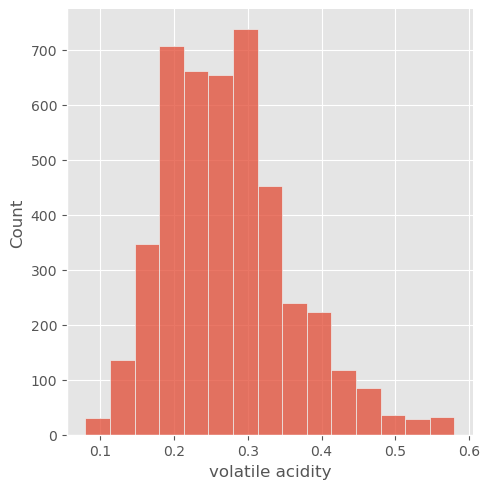

In [56]:
data_log = data.copy()
ax = sns.displot(data=data_log, x="volatile acidity", bins=15)

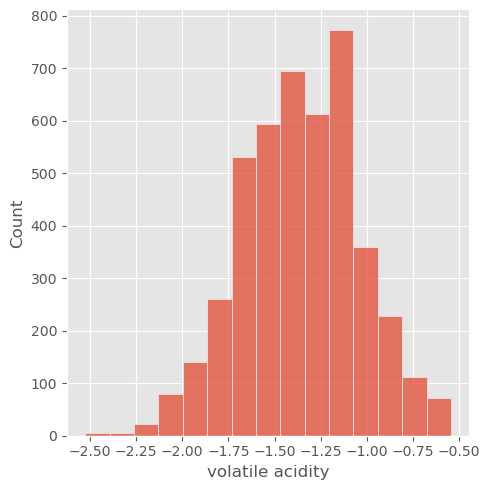

In [57]:
data_log["volatile acidity"] = np.log(data_log["volatile acidity"])
sns.displot(data=data_log, x="volatile acidity", bins=15)
None

In [58]:
X = data_log.iloc[:, :-2]
y = data_log.iloc[:, 10]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

print(f"Training set has {X_train.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")

Training set has 4038 samples.
Testing set has 449 samples.


In [59]:
sc = StandardScaler()
model = LinearRegression()

pipeline = Pipeline([("data_scaling", sc), ("estimator", model)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_scaling', StandardScaler()),
                ('estimator', LinearRegression())])

In [60]:
model_log_score = pipeline.score(X_test, y_test)
model_log_score

0.9306178767414826

In [61]:
diff = (model_log_score - model_score) / model_score
print(f"The model with transformed feature is different by {diff*100:1.3f}%")

The model with transformed feature is different by 0.021%


### Boxcox transformation

<center><a target="_blank" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html"><img src="https://drive.google.com/uc?id=1-iUY4zRqhOTUHni3zII7-XanDhSNBz3h" width="1200" style="background:none; border:none; box-shadow:none;" /></a> </center>


__A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape__. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests.

In [62]:
data_bcox = data.copy()

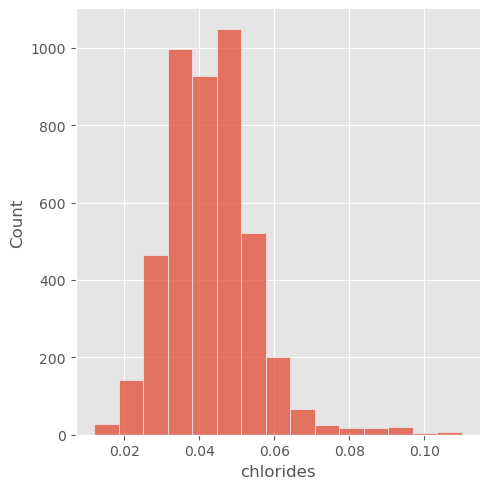

In [63]:
data_bcox = data.copy()
_ = sns.displot(data=data_bcox, x="chlorides", bins=15)

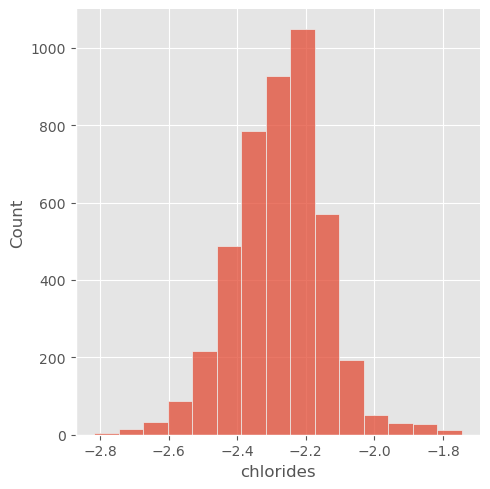

In [64]:
data_bcox["chlorides"] = stats.boxcox(data_bcox["chlorides"])[0]
_ = sns.displot(data=data_bcox, x="chlorides", bins=15)

In [65]:
X = data_bcox.iloc[:, :-2]
y = data_bcox.iloc[:, 10]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

print(f"Training set has {X_train.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")

Training set has 4038 samples.
Testing set has 449 samples.


In [66]:
sc = StandardScaler()
model = LinearRegression()

pipeline = Pipeline([("data_scaling", sc), ("estimator", model)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_scaling', StandardScaler()),
                ('estimator', LinearRegression())])

In [67]:
model_log_score = pipeline.score(X_test, y_test)
model_log_score

0.9303625949058321

In [68]:
diff = (model_log_score - model_score) / model_score
print(f"The model with transformed feature is different by {diff*100:1.3f}%")

The model with transformed feature is different by -0.006%


__The difference between scores for the model without transformation and with transformation shows us that the difference is not considerable.__

--------------
# End of This Notebook